### 1. Decision Trees and Naive bayes
***
The scikit-learn library provides different parameters for decision trees and naive bayes.

Based on the last code example in the accompanying notebook, add several new models to the classifiers variable. These models should have different parameters. For instance, create a new decision tree with a max depth of 1. Another possibility is to add different datasets or add noise.

Try to understand why some models behave differently than others. Give arguments what influences model performance and why.

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_moons, make_circles
from sklearn.inspection import DecisionBoundaryDisplay 

from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
#Understanding Decisiontrees
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

# this is for demonstration, always split for generalizability.
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

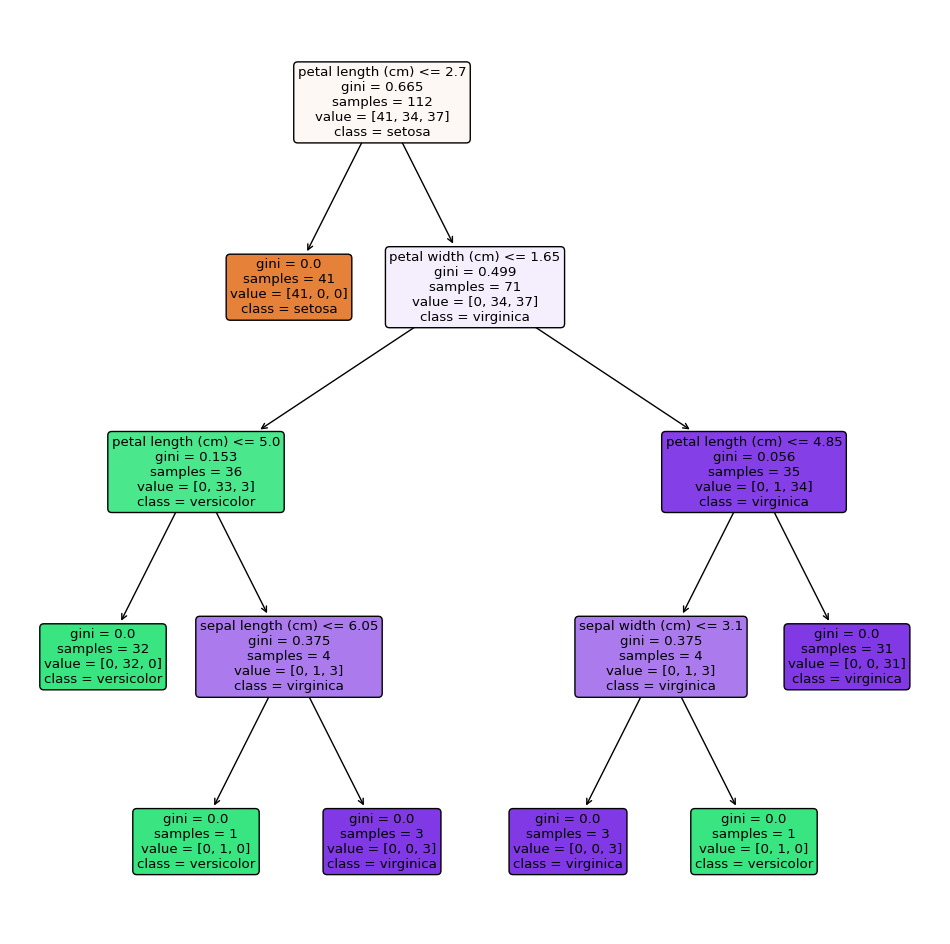

In [3]:
plt.figure(figsize=(12, 12))
tree.plot_tree(
    dt, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    filled=True,
    rounded=True,
)
plt.show()

Add some more classifiers models to test: Linear SVM, RBF SVM and Random Forest. <br>
(For SVM the rbf is the default kernel.) <br>


In [4]:
#Default set of variables of models and datasets
datasets_default = [make_moons(), make_circles()]
names = ['Decision Tree', 'Naive Bayes','Linear SVM', 'RBF SVM', 'Random Forest']
classifiers_default = [tree.DecisionTreeClassifier(), GaussianNB(), SVC(kernel='linear'), SVC(), RandomForestClassifier()]

### Plotting

Code based on Excersise E_NT_NB.ipynb (Originally?: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)

In [5]:
def make_classifier_plots(datasets,names, classifiers):
    figure = plt.figure(figsize=(10, 5))
    
    i = 1

    # iterate over datasets
    for ds_count, ds in enumerate(datasets):
        X, y = ds
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.4, random_state=0
        )
        
        # determining min point and max point and add margin
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        
        # plot dataset
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        # plot original
        if ds_count == 0:
            ax.set_title('Input data')
            
        # plot training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        
        # plot testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
        
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            
            # make pipeline to make it easier
            clf = make_pipeline(StandardScaler(), clf)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            DecisionBoundaryDisplay.from_estimator(
                clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
            )
            
            # plot training points
            ax.scatter(
                X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
            )
            # plot testing points
            ax.scatter(
                X_test[:, 0],
                X_test[:, 1],
                c=y_test,
                cmap=cm_bright,
                edgecolors="k",
                alpha=0.6,
            )
            ax.set_xlim(x_min, x_max)
            ax.set_ylim(y_min, y_max)
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_count == 0:
                ax.set_title(name)
            ax.text(
                x_max - 0.3,
                y_min + 0.3,
                ("%.2f" % score).lstrip("0"),
                size=15,
                horizontalalignment="right",
            )
            i += 1
    plt.tight_layout()
    plt.show()

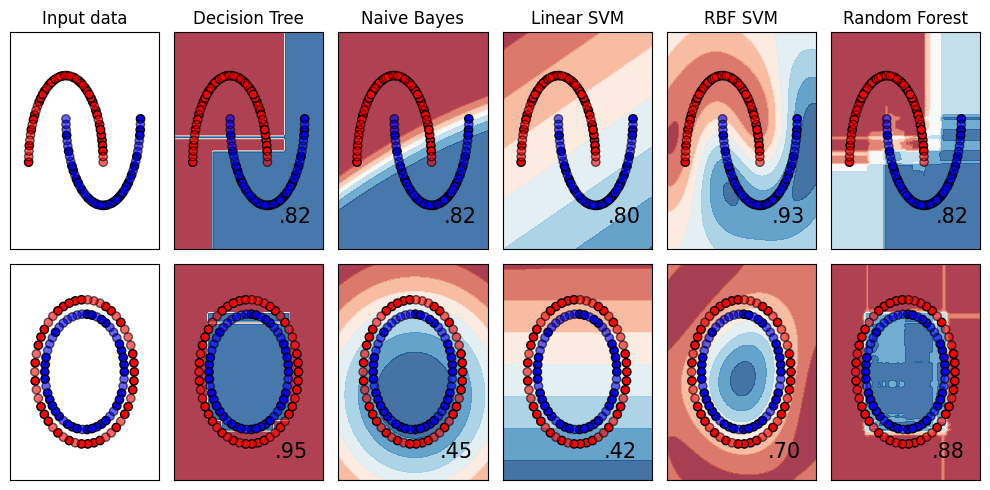

In [6]:
#Plots with default settings for datasets and classifiers
make_classifier_plots(datasets_default, names, classifiers_default)

Let's see what happens if you change some parameters in the models

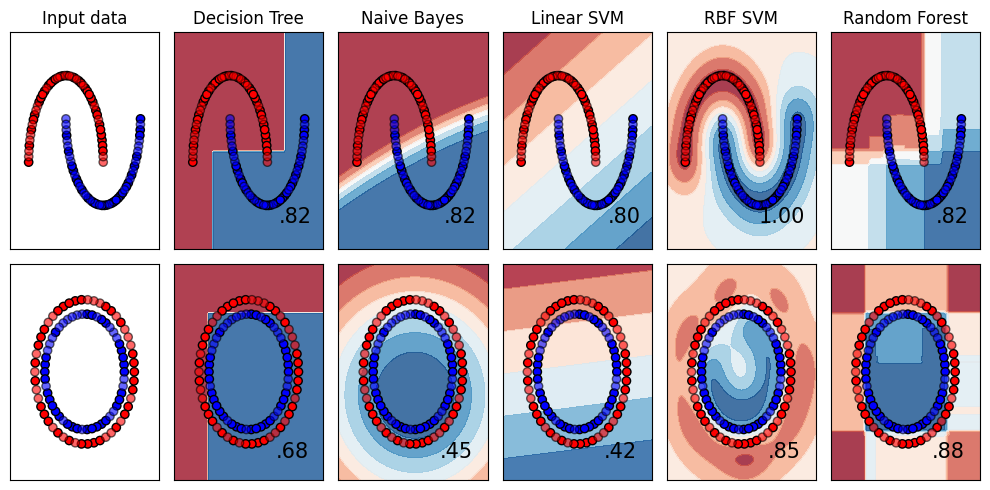

In [7]:
#Change some parameters in the models
classifiers_params = [tree.DecisionTreeClassifier(max_depth=2), GaussianNB(), SVC(kernel='linear', C=0.025), SVC(gamma=2, C=1), RandomForestClassifier(max_depth=2)]
make_classifier_plots(datasets_default, names, classifiers_params)

- Both datasets are nonlinear, so it's not surprising that Linear SVM (which uses a linear hyperplane) has a lower accuracy score compared to the other models. Lowering the penalty C parameter, decreases the error term making the model more 'strict'. Depending on what your dataset looks like, may or may not produce a different hyperplane. For example, for the moondataset nothing changes, but the accuracy does increase for the circle dataset.
- Setting a maximum depth for a decisiontree limits the amount of splits that can be performed. Making it an important parameter that you can tune. In general, having more splits in the trees will result in better classification. You can see this in the accuracy score of DecisionTree and RandomForest well. Limiting the maximum depth(splits), lowers the accuracy score. <br>
- For the Naive Bayes, It assumes that the likelihood of the features is Gaussian (normally distributed). make_moons and make_circles generate 2d binary classification datasets, making it challenging for GaussianNB (naive bayes) to accurately classify.
- RBF SVM does well with classification for both datasets. It works with non-linear hyperplanes. Increasing the gamma leads to SVM trying to exacly fit the training data. So changing it to for example 2 improves the accuracy, but now it might have overfitted on the training data.
- With default parameters RandomForest has the best accuracy scores

***

### 2. Decision Tree Evaluation
***
As shown in the in the accompanying notebook it is possible to visualize the decision tree.

For this exercise, you can use your own dataset if that is eligable for supervised classification. Otherwise, you can use the breast cancer dataset which you can find on assemblix2019 (/data/datasets/DS3/). Go through the data science pipeline as you've done before:

1. Try to understand the dataset globally.
2. Load the data.
3. Exploratory analysis
4. Preprocess data (skewness, normality, etc.)
5. Modeling (cross-validation and training)
6. Evaluation
7. Explanation

Explain how the decision tree behaves under certain circumstances. What features seem important and how are the decisions made

In [8]:
import yaml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

### The dataset
The data can be downloaded here: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data. <br>
This dataset contains samples that are diagnosed with breast cancer (malignant samples) and samples that are healthy (benign samples).

#### Loading and preprocessing

In [9]:
with open("config.yaml", 'r') as stream:
    config = yaml.safe_load(stream)
    data = pd.read_csv(config['cancer'])

In [10]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
set(data.diagnosis)

{'B', 'M'}

In [13]:
#Check the counts
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [14]:
# Check the total number of missing values
f"The total number of missing values are {data.isnull().sum().sum()}"

'The total number of missing values are 0'

In [15]:
# Histograms of all features to inspect data distribution
# for col in data:
#     if col =='diagnosis' or col== 'id':
#         continue
#     plt.figure(figsize=(2,2))
#     sns.histplot(x=col, data=data, hue='diagnosis')
#     plt.show()

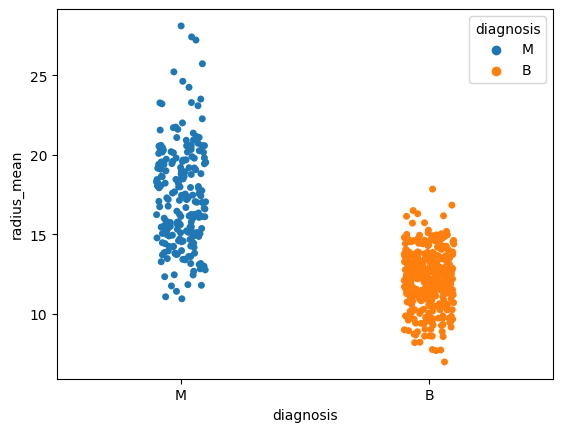

In [16]:
sns.stripplot(y='radius_mean', x='diagnosis', data=data, hue='diagnosis')
plt.show()

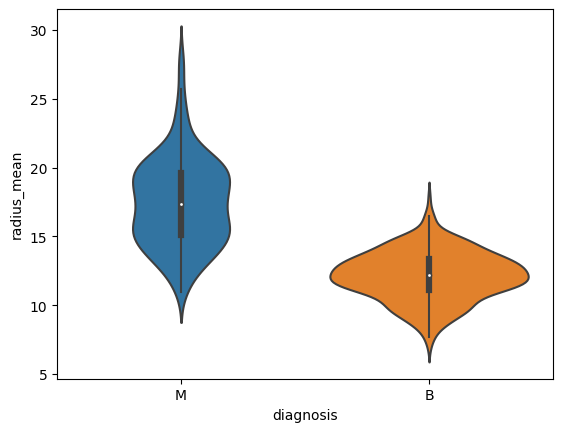

In [17]:
sns.violinplot(y='radius_mean', x='diagnosis', data=data)
plt.show()

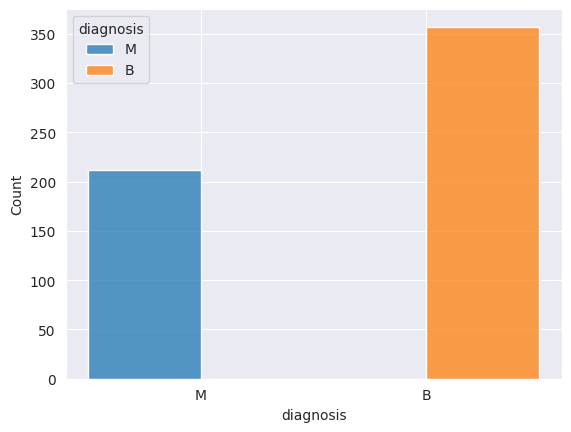

In [18]:
sns.set_style('darkgrid')
sns.histplot(data, x='diagnosis', hue='diagnosis', multiple='dodge', bins=2)
plt.show()

The diagnosis which is M (malignant) or B (benign). This feature should be changed to B = 0 and M = 1. The id feature holds no information and can be removed.

In [19]:
# Cleaning the data
data = data.drop('id',axis=1)
# Changing Benign to 0 and Malignant to 1 
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

__Correlation__ <br>

In [20]:
corr_mat = data.corr().abs()
# Strip out the diagonal values for the next step
for x in range(len(data.columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,0.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,0.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,0.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,0.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,0.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,0.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,0.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,0.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,0.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,0.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

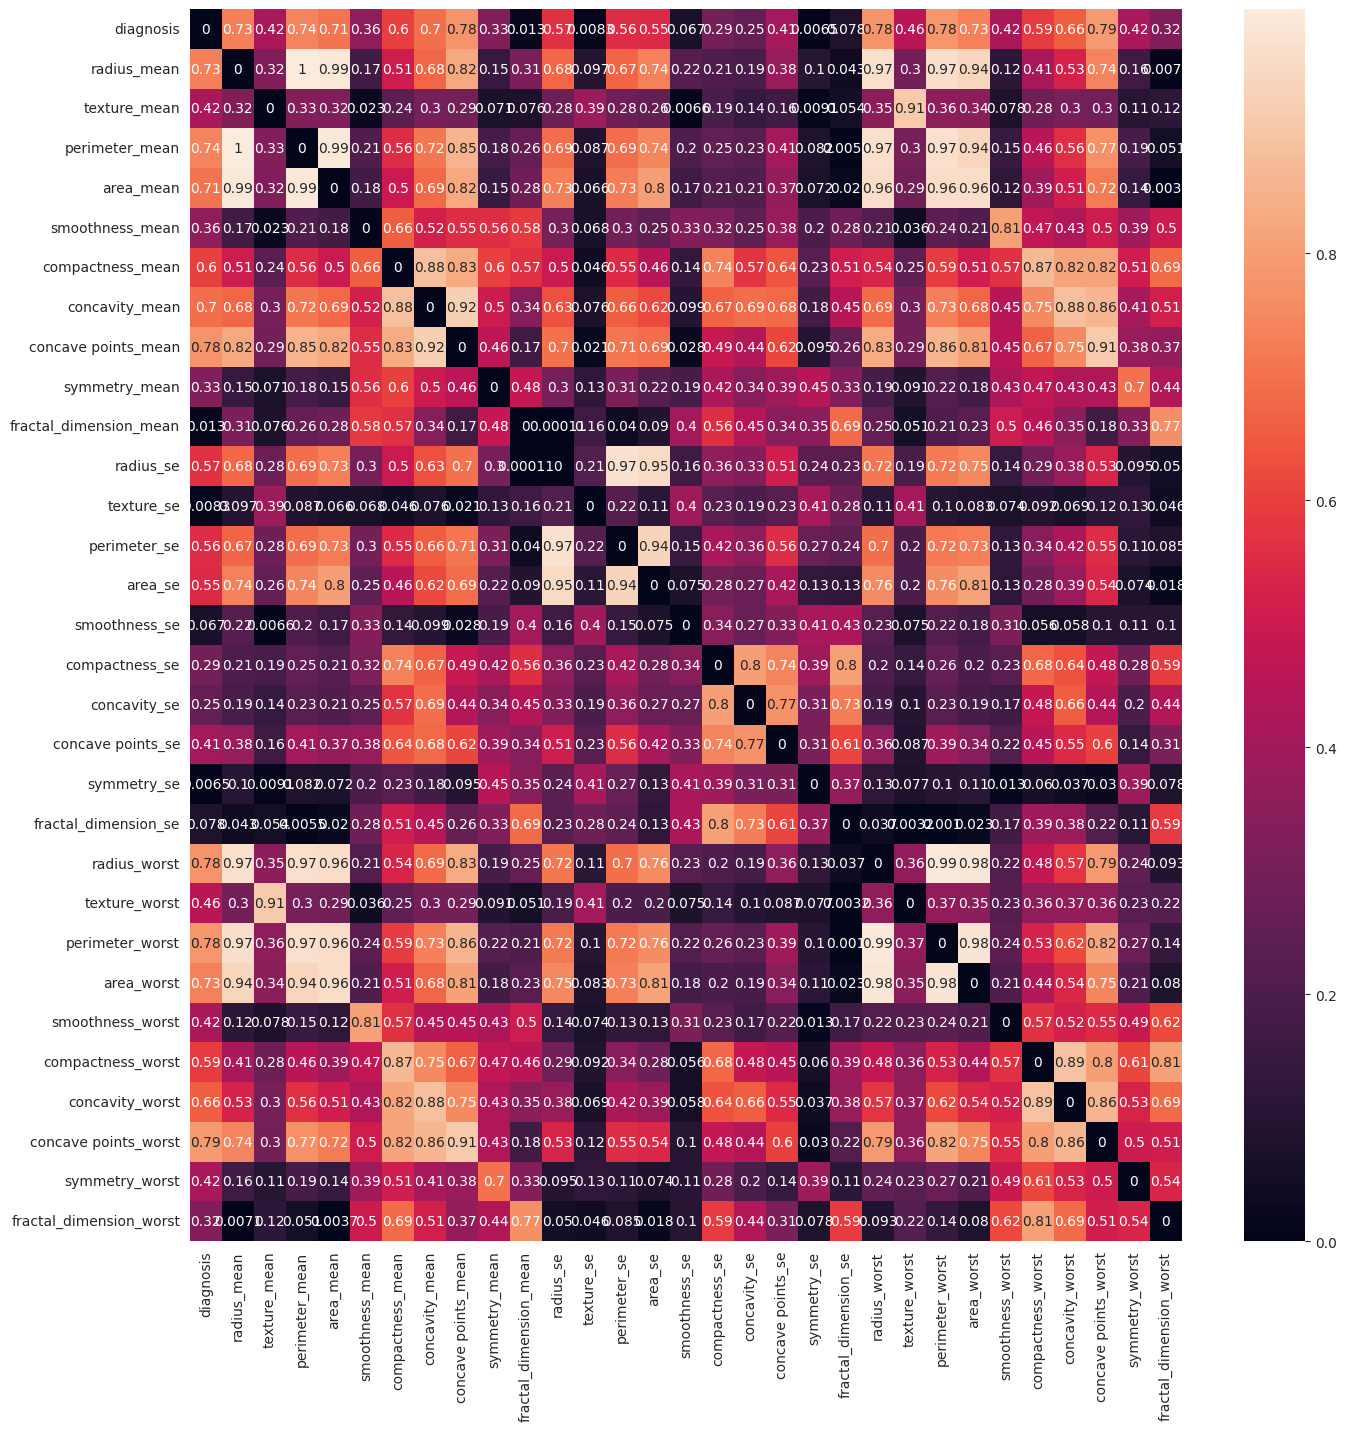

In [21]:
#plot heatmap
plt.figure(figsize=(16,16))
sns.heatmap(corr_mat, annot=True)

There seem to be forming correlation 'groups' for certain features. Also, some features with high correlation scores. Correlated features will not always worsen your model, but they will not always improve it either. We will proceed without deleting columns.

In [22]:
# see with features are highly correlated
corr_mat.idxmax()

diagnosis                     concave points_worst
radius_mean                         perimeter_mean
texture_mean                         texture_worst
perimeter_mean                         radius_mean
area_mean                              radius_mean
smoothness_mean                   smoothness_worst
compactness_mean                    concavity_mean
concavity_mean                 concave points_mean
concave points_mean                 concavity_mean
symmetry_mean                       symmetry_worst
fractal_dimension_mean     fractal_dimension_worst
radius_se                             perimeter_se
texture_se                             symmetry_se
perimeter_se                             radius_se
area_se                                  radius_se
smoothness_se                 fractal_dimension_se
compactness_se                fractal_dimension_se
concavity_se                        compactness_se
concave points_se                     concavity_se
symmetry_se                    

In [23]:
#how much are they correlated?
corr_mat.max().sort_values(ascending=False)

perimeter_mean             0.997855
radius_mean                0.997855
perimeter_worst            0.993708
radius_worst               0.993708
area_mean                  0.987357
area_worst                 0.984015
radius_se                  0.972794
perimeter_se               0.972794
area_se                    0.951830
concavity_mean             0.921391
concave points_mean        0.921391
texture_worst              0.912045
texture_mean               0.912045
concave points_worst       0.910155
compactness_worst          0.892261
concavity_worst            0.892261
compactness_mean           0.883121
fractal_dimension_worst    0.810455
smoothness_worst           0.805324
smoothness_mean            0.805324
compactness_se             0.803269
fractal_dimension_se       0.803269
concavity_se               0.801268
diagnosis                  0.793566
concave points_se          0.771804
fractal_dimension_mean     0.767297
symmetry_mean              0.699826
symmetry_worst             0

Many features are correlated, it might be that reducing features  will perform better

In [24]:
# Check if the dat is skewed
# .skew 0: no skew, + right skew, - left skew, look for above .75 
skew_columns = (data
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
dtype: float64

For the preprocessing a pipeline will be created where a logtransform will be implemented on the skewed columns and afterwards a standardscaler will be used on the data.<br>
Columntransformer needs the column names that you want or do not want to transform, so create lists of the column names

In [25]:
skew_columns = skew_columns.index.to_list()

In [26]:
rest = list(data.columns.difference(skew_columns))

In [27]:
rest.remove('diagnosis')

In [28]:
col_names = data.columns.values.tolist()
col_names.remove('diagnosis')

In [29]:
# Save the diagnosis seperately
dftest = data['diagnosis']

In [30]:
log_transform = FunctionTransformer(np.log1p)

With a Columntransformer you can apply different transformations to columns (log, identity, drop)

In [31]:
# This column transformer applies a log transform on the skewed columns, drop the remainding columns (in this case diagnosis) 
# and does not do anything to the other columns (passthrough) 
ct = ColumnTransformer(
                       [("log_transform",  log_transform, skew_columns),
                        ("identity", "passthrough", rest)
                       ],
                       remainder = "drop")

In the preprocessing pipeline you apply your transformations and scaler

In [32]:
#Preprocessing pipeline
prep = Pipeline([('transform', ct), ('scaler', StandardScaler())])

In [33]:
# use the pipeline like you would any model
prep_data = prep.fit_transform(data)

In [34]:
prep_data.shape

(569, 30)

In [35]:
prep_data

array([[ 2.29486227e+00,  7.77126899e-01,  9.11939092e-01, ...,
         2.21751501e+00, -2.07333501e+00, -1.35929347e+00],
       [ 1.27254123e+00, -4.58067805e-01, -9.86496469e-02, ...,
         1.39236330e-03, -3.53632408e-01, -3.69203222e-01],
       [ 1.60666140e+00,  2.40449862e-01,  2.96258017e-01, ...,
         9.39684817e-01,  4.56186952e-01, -2.39743838e-02],
       ...,
       [ 6.83286848e-01,  5.54152678e-01,  3.82269989e-02, ...,
        -8.09117071e-01,  2.04557380e+00,  1.37485378e+00],
       [ 1.48506068e+00,  1.37511469e+00,  9.08904876e-01, ...,
         2.13719425e+00,  2.33645719e+00,  2.23792588e+00],
       [-5.92540630e-01, -1.12941866e+00, -3.83586536e-01, ...,
        -8.20069901e-01,  1.22179204e+00,  7.64189567e-01]])

In [36]:
#Store the transformed and data back into a pandas dataframe
df = pd.DataFrame(data=prep_data, columns=col_names)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,2.294862,0.777127,0.911939,2.524796,2.495079,-0.213311,1.157393,1.331346,1.794344,1.939736,...,2.022158,1.764045,1.281628,1.138030,2.296076,1.568466,1.307686,2.217515,-2.073335,-1.359293
1,1.272541,-0.458068,-0.098650,0.554028,0.656899,-0.606471,-0.811055,-0.699560,1.737118,0.292501,...,1.502321,1.706795,1.597721,1.711783,1.087084,-0.826962,-0.375612,0.001392,-0.353632,-0.369203
2,1.606661,0.240450,0.296258,1.158139,1.397258,-0.296660,0.242895,0.830782,1.493444,0.211979,...,1.362620,1.490832,1.509470,1.524183,1.955000,0.942210,0.527407,0.939685,0.456187,-0.023974
3,-0.114440,0.876556,2.053745,0.580904,0.467214,0.692827,4.688576,2.731916,-0.494860,4.813255,...,-0.130272,-0.179580,-0.550424,-0.774335,2.175786,3.283553,3.394275,2.867383,0.253732,0.133984
4,1.612766,0.885864,0.502861,1.517503,1.437110,1.486324,-0.360720,-0.040635,1.346061,-0.395358,...,1.355825,1.326223,1.663405,1.652935,0.729259,0.280372,0.220556,-0.009560,-1.151816,-1.466770


In [37]:
# Add back the  diagnosis column
df = pd.concat([dftest, df], axis=1)

In [38]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,2.294862,0.777127,0.911939,2.524796,2.495079,-0.213311,1.157393,1.331346,1.794344,...,2.022158,1.764045,1.281628,1.138030,2.296076,1.568466,1.307686,2.217515,-2.073335,-1.359293
1,1,1.272541,-0.458068,-0.098650,0.554028,0.656899,-0.606471,-0.811055,-0.699560,1.737118,...,1.502321,1.706795,1.597721,1.711783,1.087084,-0.826962,-0.375612,0.001392,-0.353632,-0.369203
2,1,1.606661,0.240450,0.296258,1.158139,1.397258,-0.296660,0.242895,0.830782,1.493444,...,1.362620,1.490832,1.509470,1.524183,1.955000,0.942210,0.527407,0.939685,0.456187,-0.023974
3,1,-0.114440,0.876556,2.053745,0.580904,0.467214,0.692827,4.688576,2.731916,-0.494860,...,-0.130272,-0.179580,-0.550424,-0.774335,2.175786,3.283553,3.394275,2.867383,0.253732,0.133984
4,1,1.612766,0.885864,0.502861,1.517503,1.437110,1.486324,-0.360720,-0.040635,1.346061,...,1.355825,1.326223,1.663405,1.652935,0.729259,0.280372,0.220556,-0.009560,-1.151816,-1.466770


In [39]:
#plot_tree later needs class_name to be string
df['diagnosis'] = df['diagnosis'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [40]:
#Split the data into train and test data
y = df['diagnosis']
X = df.drop(columns='diagnosis')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
print(f'Total amount of samples in dataset is {len(df.diagnosis)}')
print(f'The training data set has {len(X_train)} samples')
print(f'The test dataset has {len(X_test)} samples')

Total amount of samples in dataset is 569
The training data set has 455 samples
The test dataset has 114 samples


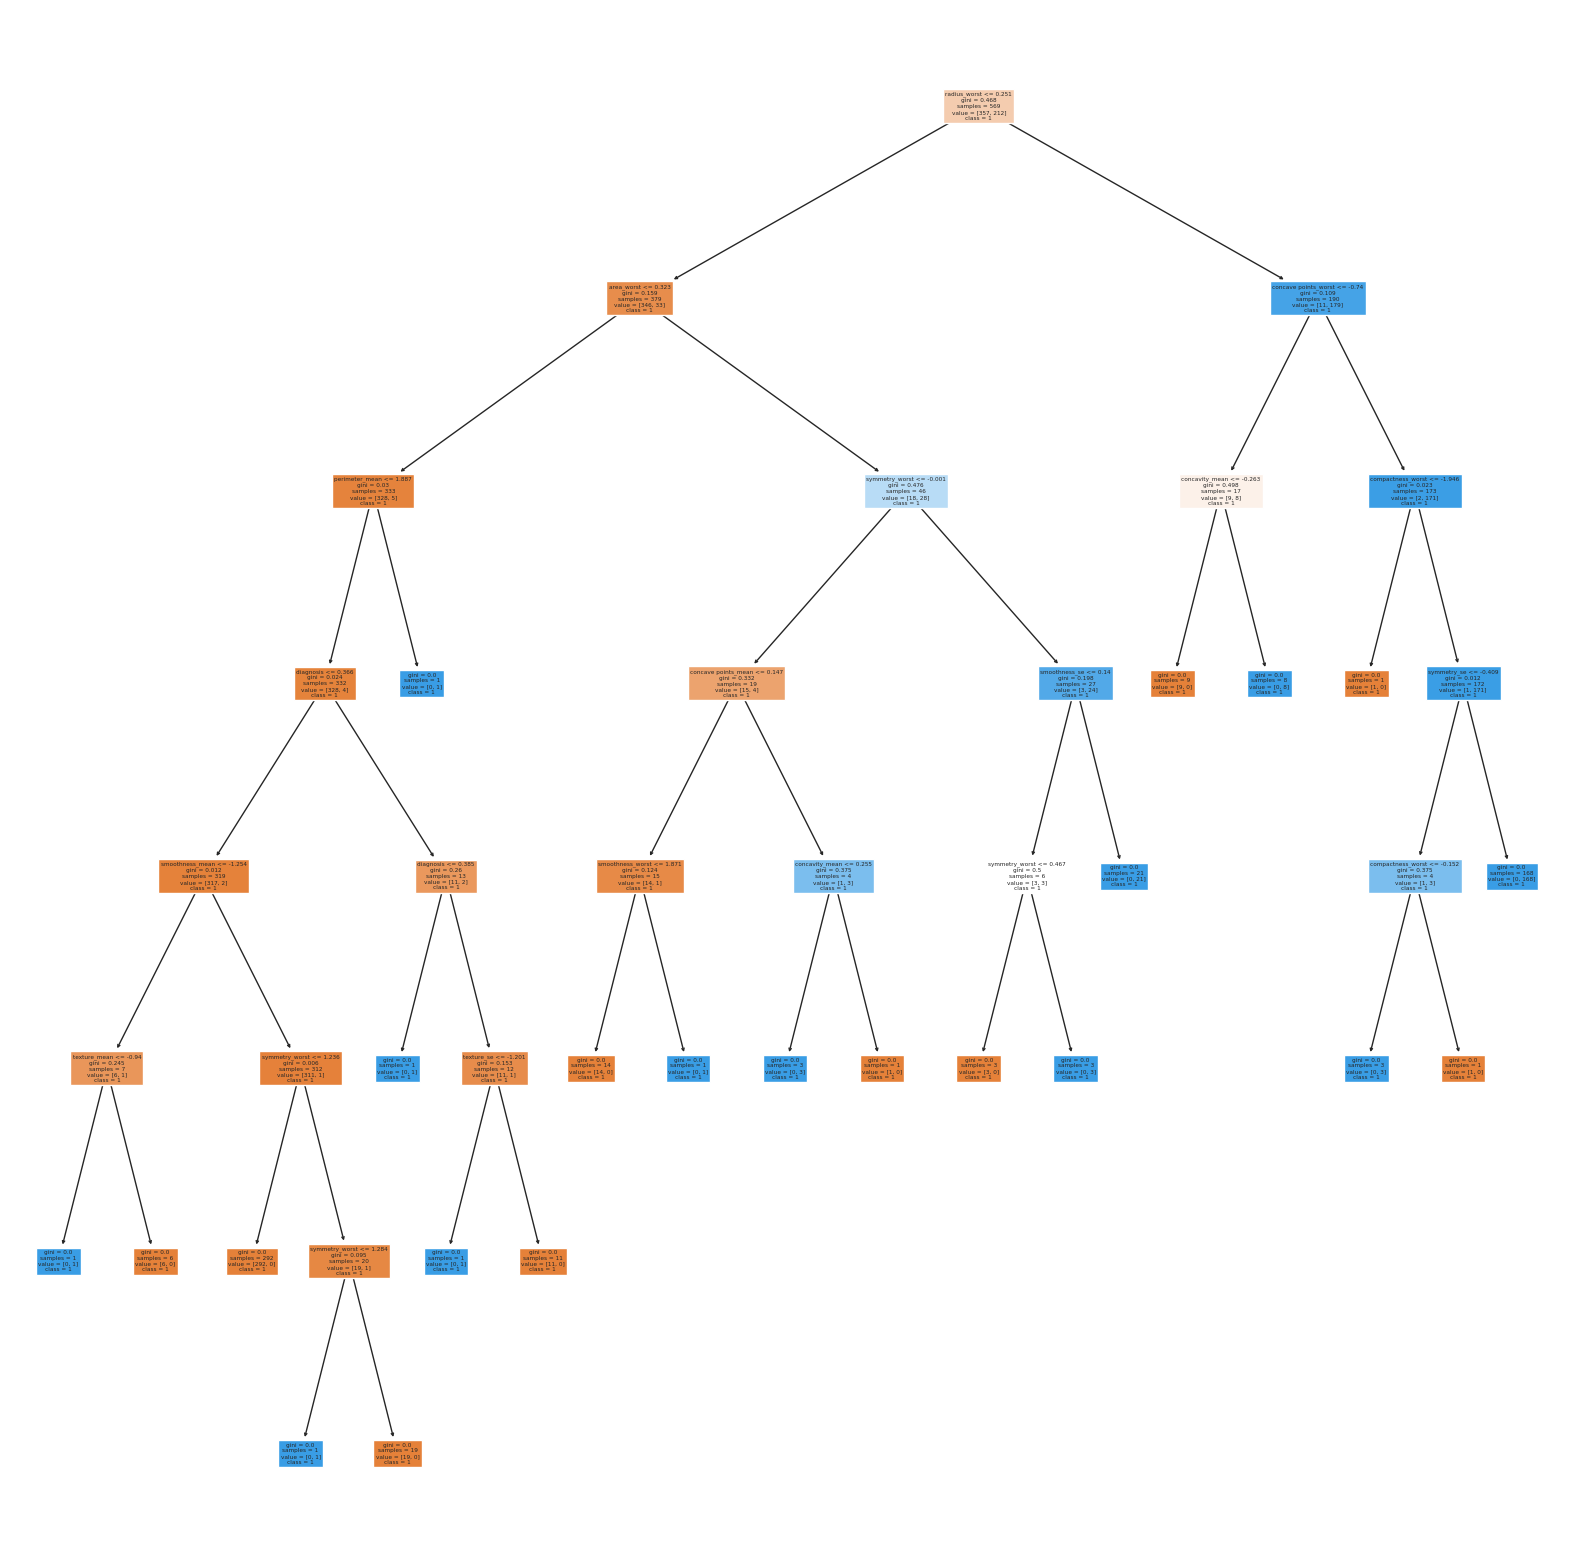

In [52]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X, y)

plt.figure(figsize=(20, 20))
tree.plot_tree(
    dtree,
    feature_names=df.columns,
    class_names=df['diagnosis'],
    filled=True,
    rounded=False,
)
plt.show()
# Hovering over the plot there is an option expand the image to actually read the tree :S

From tutorial_Clustering_Methods.ipynb: <br>
It uses StratifiedShuffleSplit with 10 splits, fit 10 decisiontrees and find the mean of the ROC-AUC scores from these 10 classifiers.<br>
It gives the average roc-auc scores

In [43]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    # loop to 10 batches
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)

sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

roc = get_avg_roc_10splits(dtree, X, y)
print(roc)

0.9089285714285713


In [44]:
y_scored = dtree.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_scored))

0.971260717688155


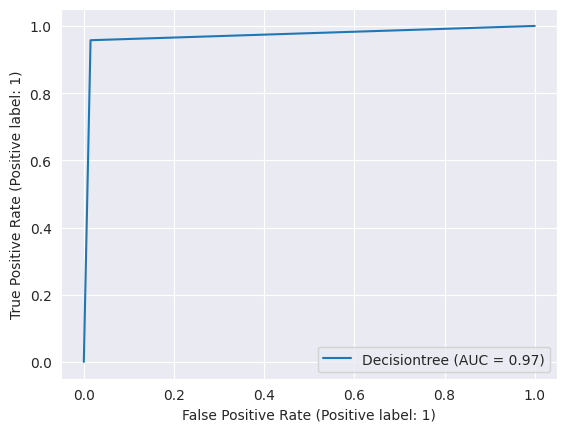

In [45]:
from sklearn.metrics import RocCurveDisplay
tree_plot = RocCurveDisplay.from_estimator(dtree, X_test, y_test)
plt.close()
tree_plot.plot(name='Decisiontree')
plt.show()

Explain how the decision tree behaves under certain circumstances. What features seem important and how are the decisions made
- A parameter that is  important is the max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data.
- All the decisions/predictions in the tree seem to be made based on the class 1 (malignant samples). You would expect that there also would be predictions for 0 (Benign samples), like with the different species for the iris data set. It's possible something went wrong with adding back the diagnosis and than labeling.
- Import features seem to be radius_worst, area_worst, concave_point_worst, radius_mean, compactness_worst, symmetry_worst and perimeter_mean

### 3. Naive Bayes
***
During the Corona pandemic, seven roommates in a student house did a Corona test. The table below show the data of these students: whether they experiences shivers, had a running nose, or had a headache. The test result is also shown.

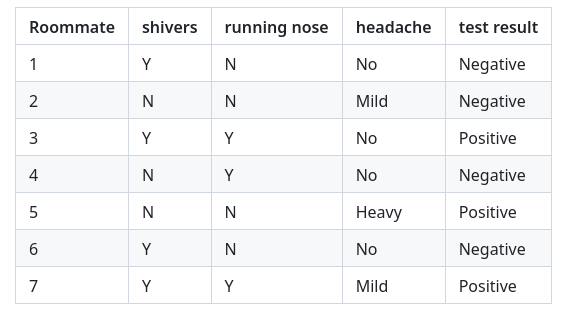

Explain why it is not useful to include the column 'Roommate' in a classification procedure.

Train a Categorical Naive Bayes classifier on this dataset, where the Test Results are your classes and the other features the data. For this to work, you'll need Pandas get_dummies to transform the nominal data into something that sklearn can work with. Use all seven rows in your training.

If you let your fitted classifier predict the test results (based on all the data), you will (hopefully) see that the prediction for observation number 5 (1-based) is wrong (it predicts Negative while the actual value is Positive). Show by manual calculation that the prediction for this instance is indeed higher (p = 0.527
) for the Negative class than for the Positive class.

Naive bayes are methods based on Bayes' theorem with the assumption of conditional independence between every pair of features given the value of a class variable.
The roommate column is not useful

In [72]:
from sklearn.naive_bayes import CategoricalNB

data = {'shivers': ['Y', 'N', 'Y', 'N', 'N','Y','Y'],
        'running nose': ['N', 'N','Y','Y','N','N','Y'],
        'headache': ['No','Mild', 'No','No','Heavy', 'No','Mild'],
        'test result': ['Neg','Neg','Pos','Neg','Pos','Neg', 'Pos']}
df_nb = pd.DataFrame(data)
df_nb

,shivers,running nose,headache,test result
0,Y,N,No,Neg
1,N,N,Mild,Neg
2,Y,Y,No,Pos
3,N,Y,No,Neg
4,N,N,Heavy,Pos
5,Y,N,No,Neg
6,Y,Y,Mild,Pos


In [73]:
X = df_nb[['shivers', 'running nose', 'headache']]
y = df_nb['test result']
X

,shivers,running nose,headache
0,Y,N,No
1,N,N,Mild
2,Y,Y,No
3,N,Y,No
4,N,N,Heavy
5,Y,N,No
6,Y,Y,Mild


In [74]:
X_d = pd.get_dummies(X)
y.to_numpy().reshape(7,)


array(['Neg', 'Neg', 'Pos', 'Neg', 'Pos', 'Neg', 'Pos'], dtype=object)

In [76]:
clf = CategoricalNB()
clf.fit(X_d, y.to_numpy().reshape(7,))
clf.predict(X_d)


array(['Neg', 'Neg', 'Pos', 'Neg', 'Neg', 'Neg', 'Pos'], dtype='<U3')

In [77]:
y

0    Neg
1    Neg
2    Pos
3    Neg
4    Pos
5    Neg
6    Pos
Name: test result, dtype: object

fifth prediction is indeed negative compared to the actual result (positive)

In [80]:
df_nb.loc[df_nb['test result'] == 'Neg']

,shivers,running nose,headache,test result
0,Y,N,No,Neg
1,N,N,Mild,Neg
3,N,Y,No,Neg
5,Y,N,No,Neg


In [82]:
df_nb.loc[df_nb['test result'] == 'Pos']

,shivers,running nose,headache,test result
2,Y,Y,No,Pos
4,N,N,Heavy,Pos
6,Y,Y,Mild,Pos


In [97]:
#Manual calculation
# Amount of positive and negative test results of the total
pos_result = 3/7
neg_result = 4/7

# Negative results: 2/4 have shivers, 1/4 has a runny nose, 0/4 have a heavy headache: 0/4 (replace 0 with 1 otherwise total is 0)
neg_likelihood = 2/4 * 1/4 * 4/4 * neg_result

#Positive results: 2/3 have shivers, 2/3 have a runny nose, 1/3 has a heavy headache
pos_likelihood = 2/3 * 2/3 * 1/3 * pos_result

prob_neg = neg_likelihood / (pos_likelihood + neg_likelihood)
prob_pos = pos_likelihood / (pos_likelihood + neg_likelihood)

print(f'Likelihood of negative test result is \t{neg_likelihood:.4f}\n'
      f'likelihood of positive test result is \t{pos_likelihood:.4f}\n\n'
      f'Probability of negative test result is \t{prob_neg:.4f}\n'
      f'Probability of positive test result is \t{prob_pos:.4f} ')

Likelihood of negative test result is 	0.0714
likelihood of positive test result is 	0.0635

Probability of negative test result is 	0.5294
Probability of positive test result is 	0.4706 


In [98]:
prob_neg > prob_pos

True

The prediction for the negative result is indeed higher than of the positive result